# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATASET

In [2]:
movies = pd.read_csv(r'C:\Users\Zoe\AppData\Local\Temp\Temp1_archive (7).zip\movies.csv')
ratings = pd.read_csv(r'C:\Users\Zoe\AppData\Local\Temp\Temp1_archive (7).zip\ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


CREATING NEW DATASET, WHICH ONLY INVOLVES *'movieId'* , *'userId'*, *'rating'*.

In [5]:
#CREATING NEW DATASET
df = ratings.pivot(index = 'movieId', columns = 'userId', values = 'rating')
df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#filling null values
df = df.fillna(0)
df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


REMOVE NOISE 

- We wouldn't want movies that were rated by a smattering user's, In veiw of the fact that it is not feasible.

- likewise, User's who have rated a handful number of movies should not be taken into account.

So taking these points into consideration, we need to set a threshold to remove noise.
   
   - to qualify a movie, minimum 10 user should have voted a movie
    
   - to qualify a user, minimum 50 movies should have voted by user.





In [7]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_user_voted

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

In [8]:
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')
no_movies_voted

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

C:\Users\Zoe\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

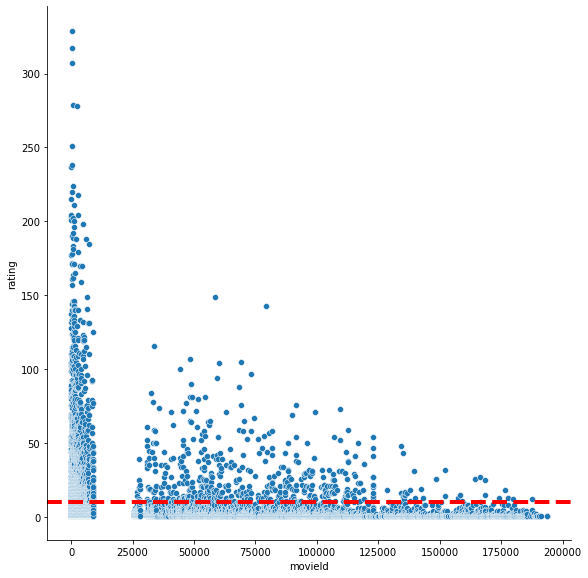

In [9]:
# setting movie rating threshold 
plt.figure(figsize = (10,10))
sns.FacetGrid(df, size = 8)
v = sns.scatterplot(x = no_user_voted.index,y = no_user_voted,palette = "flare")
v.axhline(y= 10, linewidth=4, color='r', linestyle= '--')
plt.show()

- SETTING MOVING THRESHOLD TO 10.

In [10]:
#setting movie_Rating threshold 10
df = df.loc[no_user_voted[no_user_voted > 10].index, :]
df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\Zoe\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

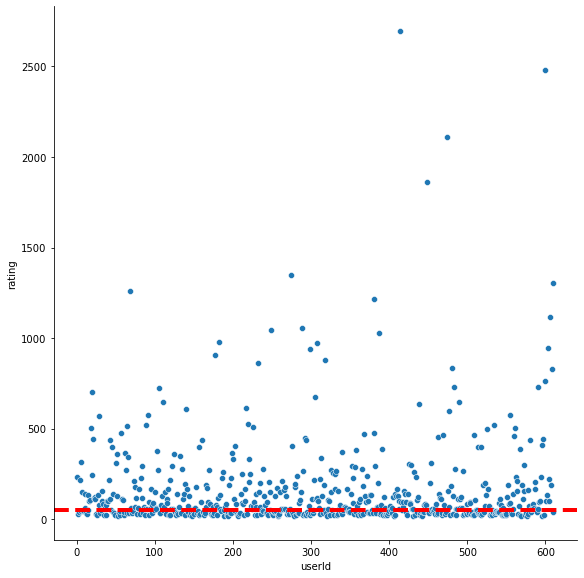

In [11]:
#user rating threshold
plt.figure(figsize = (10,10))
sns.FacetGrid(df, size = 8)
v = sns.scatterplot(x = no_movies_voted.index,y = no_movies_voted,palette = "flare")
v.axhline(y= 50, linewidth=4, color='r', linestyle= '--')
plt.show()

- SETTING USER THRESHOLD TO 50.

In [12]:
#setting user_rating threshold
df = df.loc[:, no_movies_voted[no_movies_voted > 50].index]
df

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df1 = df
df1

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


REMOVING SPARSITY.

- HERE, THE COLLUMN 2121 * 378 . WE ARE USING SMALL DATASET AND IT CONSTAINS 1000 FEATRUES DUE TO WHICH OUR SYSTEM MAY RUN OUT OF THE COMPUTATIONAL RESOURCES WHEN THAT IS FEED TO MODEL.





- TO REDUCE THE SPARSITY WE'LL BE USING *' csr_matrix '* FROM SCIPY.

In [14]:
#remove sparsity
df2 = csr_matrix(df.values)
df.reset_index(inplace = True)

APPLYING  *knn* ALGORITHM TO COMPUTE SIMILARITY WITH *cosine distance *  METRIC WHICH QUICK AND MORE PREFERABLE THAN  
*pearson coefficient*

In [15]:
#creating model using knn
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors = 20, n_jobs = -1)
knn.fit(df2)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

CREATING FUNCTION FOR RECOMMENDING MOVIES

In [16]:
#creating function for recommendation
global df
def recommend(movie_name):
    movies_to_recommend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_id = movie_list.iloc[0]['movieId']
        movie_id = df1[df1['movieId'] == movie_id].index[0]
        
        distances, indices = knn.kneighbors(df2[movie_id], n_neighbors = movies_to_recommend +1)
        movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key = lambda x :x[1])[:0:-1]
        
         
        recommend_frame = []
        for i in movie_indices:
            movie_id = df1.iloc[i[0]]['movieId']
            id_ = movies[movies['movieId'] == movie_id].index
            
            recommend_frame.append({'Title': movies.iloc[id_]['title'].values[0], 'distance': i[1]})
            
        df = pd.DataFrame(recommend_frame, index=range(1, movies_to_recommend+1))
        return df
    else:
        return 'No movies found. Check input.'
        
    
    

In [17]:
recommend('Iron Man 2')

,Title,distance
1,"Amazing Spider-Man, The (2012)",0.397641
2,Sherlock Holmes (2009),0.396572
3,Ant-Man (2015),0.392047
4,Scott Pilgrim vs. the World (2010),0.385945
5,Captain America: The Winter Soldier (2014),0.373922
6,Guardians of the Galaxy (2014),0.327615
7,Iron Man 3 (2013),0.324120
8,Iron Man (2008),0.307492
9,"Avengers, The (2012)",0.304975
10,X-Men: First Class (2011),0.260364


In [18]:
recommend('Ant-Man')

,Title,distance
1,Thor: The Dark World (2013),0.383046
2,Kingsman: The Secret Service (2015),0.377068
3,Captain America: The Winter Soldier (2014),0.376943
4,Untitled Spider-Man Reboot (2017),0.368109
5,X-Men: Apocalypse (2016),0.338759
6,Man of Steel (2013),0.335081
7,Guardians of the Galaxy (2014),0.333083
8,Star Wars: Episode VII - The Force Awakens (2015),0.328174
9,Iron Man 3 (2013),0.322229
10,Captain America: Civil War (2016),0.287791


In [19]:
recommend('Doctor Strange')

,Title,distance
1,Untitled Spider-Man Reboot (2017),0.379119
2,Avengers: Infinity War - Part I (2018),0.367247
3,Arrival (2016),0.357249
4,Blade Runner 2049 (2017),0.347472
5,Thor: Ragnarok (2017),0.338228
6,Wonder Woman (2017),0.318766
7,Captain America: Civil War (2016),0.313608
8,Rogue One: A Star Wars Story (2016),0.303851
9,Guardians of the Galaxy 2 (2017),0.299120
10,Logan (2017),0.259418


In [20]:
recommend('Beauty and the Beast')

,Title,distance
1,Toy Story (1995),0.443415
2,Pretty Woman (1990),0.440889
3,Jumanji (1995),0.435007
4,"Santa Clause, The (1994)",0.433467
5,Pocahontas (1995),0.420355
6,Jurassic Park (1993),0.402543
7,Mrs. Doubtfire (1993),0.389210
8,Snow White and the Seven Dwarfs (1937),0.352519
9,"Lion King, The (1994)",0.253046
10,Aladdin (1992),0.249502


- THESE ARE SOME MOVIE RECOMMENDATION ILLUSTRATION USING RECOMMEND FUNCTION.

- THUS, THE FOLLOWING STEPS MENTIONED ABOVE ARE USED TO BUILD MOVIE RECOMMEND SYSTEM. THANK YOU.